In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [33]:
old_df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding = 'latin1')

In [34]:
from sklearn.model_selection import train_test_split

# Assume 'sentiment' is the column with sentiment labels
X = old_df.drop('0', axis=1)  # Features
y = old_df['0']  # Sentiment labels

# Perform stratified sampling
X_sample, X_unused, y_sample, y_unused = train_test_split(
    X, y,
    test_size=0.50,  # Take 25% of the data
    stratify=y,  # Ensure the same class distribution
    random_state=42  # For reproducibility
)

# Combine back into a DataFrame
df_sampled = pd.concat([X_sample, y_sample], axis=1)


<Axes: xlabel='0'>

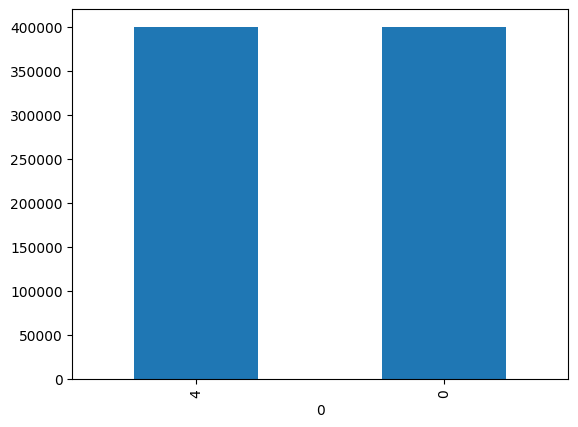

In [35]:
df_sampled['0'].value_counts().plot(kind = 'bar')

In [36]:
df_sampled.shape[0]/old_df.shape[0]*100

49.99996874998047

In [39]:
renamed_columns = {}
for col in df_sampled.columns:
    if '@switchfoot' in col:
        renamed_columns[col] = 'text'
    elif 'TheSpecialOne' in col:
        renamed_columns[col] = 'users'
    elif '1467810369' in col:
        renamed_columns[col] = 'user_ID'
    else:
        renamed_columns[col] = col  

# Now apply the renaming using the dictionary
df_sampled.rename(columns=renamed_columns, inplace=True)


In [40]:

df_sampled.drop(columns = ['user_ID','users','NO_QUERY','Mon Apr 06 22:19:45 PDT 2009'],inplace = True)

In [41]:
df_sampled.columns

Index(['text', '0'], dtype='object')

In [43]:
renamed_columns = {}
for col in df_sampled.columns:
    if '0' in col:
        renamed_columns[col] = 'classes'
df.rename(columns = renamed_columns, inplace = True)


In [44]:
df_sampled.shape

(799999, 2)

In [45]:
## text preprocessing
import pandas as pd

# Remove HTML tags
df_sampled['cleaned_text'] = df_sampled['text'].str.replace(r'<.*?>', '', regex=True)
# Remove URLs
df_sampled['cleaned_text'] = df_sampled['cleaned_text'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)
# Remove special character_sans
df_sampled['cleaned_text'] = df_sampled['cleaned_text'].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)


In [46]:
df_sampled['cleaned_text'][0] #cleaned text

'is upset that he cant update his Facebook by texting it and might cry as a result  School today also Blah'

In [47]:
#lowercasing the data
df_sampled['cleaned_text'] = df_sampled['cleaned_text'].str.lower()
df_sampled['cleaned_text']

1448019    check this out matt nathanson  come on get hig...
214516                   argh bubbletea wait  forever today 
813891              solorunner thank you have a safe flight 
387550     andrewdotnich ah yes he mentioned he might be ...
391246     horrible flight kid kicking my seat for 6 hour...
                                 ...                        
1484735     mcdonoughab you and jrball05 live at that place 
935861     credit unions ftw cashed my cheque in straight...
1163347    rkartha agree but then again back to my question 
838270     just turned from the foolery known as for the ...
396934     new blog post why isnt it working for me   min...
Name: cleaned_text, Length: 799999, dtype: object

In [48]:
##removing the stopwords using NLTK
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

# Apply the function in a vectorized manner
df_sampled['cleaned_text'] = df_sampled['cleaned_text'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
df_sampled

,text,0,cleaned_text
1448019,"Check this out: Matt Nathanson - Come On, Get ...",4,check matt nathanson come get higher lyrics ly...
214516,Argh. Bubbletea wait = forever today,0,argh bubbletea wait forever today
813891,@SoloRunner thank you! Have a safe flight!,4,solorunner thank safe flight
387550,"@andrewdotnich Ah yes, he mentioned he might b...",0,andrewdotnich ah yes mentioned might required ...
391246,Horrible flight. Kid kicking my seat for 6 hou...,0,horrible flight kid kicking seat 6 hours red e...
...,...,...,...
1484735,@mcdonoughab you and @jrball05 live at that pl...,4,mcdonoughab jrball05 live place
935861,Credit Unions FTW. Cashed my cheque in straigh...,4,credit unions ftw cashed cheque straight away
1163347,"@rkartha Agree. But then again, back to my que...",4,rkartha agree back question
838270,just turned from the foolery known as For the ...,4,turned foolery known love ray j black beautifu...


In [51]:
#stratified sampling
from sklearn.model_selection import train_test_split

# Assume 'sentiment' is the column with sentiment labels
X = df_sampled.drop('0', axis=1)  # Features
y = df_sampled['0']  # Sentiment labels

# Perform stratified sampling
X_sample, X_unused, y_sample, y_unused = train_test_split(
    X, y,
    test_size=0.75,  # Take 25% of the data
    stratify=y,  # Ensure the same class distribution
    random_state=42  # For reproducibility
)

# Combine back into a DataFrame
new_df = pd.concat([X_sample, y_sample], axis=1)


In [53]:
new_df #stratified sampling

,text,cleaned_text,0
1238099,`what a tiring day..,tiring day,4
1026346,@aliholden he's good! wiggling all around this...,aliholden hes good wiggling around morning,4
171341,#thingsmummysaid...rollercoasters are only mul...,thingsmummysaidrollercoasters multistorey car ...,0
888304,"@FlyAArmy apple is a good company, and I've re...",flyaarmy apple good company ive really never p...,4
497900,@Jillzarin i want one of your team jill v-neck...,jillzarin want one team jill vneck tshirts bad...,0
...,...,...,...
664855,Catastrophe-my banana just took a dump. on th...,catastrophemy banana took dump office floormaj...,0
910453,"And, I'm accumulating money again, so I can us...",im accumulating money use fancy finance app th...,4
1313277,@lilumi Ð¡ÐºÑÐ¸Ð¿ÑÑ Ñ Ð½Ð°Ñ? Ð² ÑÑÐºÐ°Ñ ...,lilumi onclick onmouseover c,4
1279550,@nike620 Yay go you!! P.S. Catherine thought y...,nike620 yay go ps catherine thought cake today...,4


In [54]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

def process_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Stem tokens
    stems = [stemmer.stem(token) for token in tokens]
    return stems

# Apply tokenization and stemming
new_df['processed_text'] = new_df['cleaned_text'].apply(process_text)

new_df


,text,cleaned_text,0,processed_text
1238099,`what a tiring day..,tiring day,4,"[tire, day]"
1026346,@aliholden he's good! wiggling all around this...,aliholden hes good wiggling around morning,4,"[aliholden, he, good, wiggl, around, morn]"
171341,#thingsmummysaid...rollercoasters are only mul...,thingsmummysaidrollercoasters multistorey car ...,0,"[thingsmummysaidrollercoast, multistorey, car,..."
888304,"@FlyAArmy apple is a good company, and I've re...",flyaarmy apple good company ive really never p...,4,"[flyaarmi, appl, good, compani, ive, realli, n..."
497900,@Jillzarin i want one of your team jill v-neck...,jillzarin want one team jill vneck tshirts bad...,0,"[jillzarin, want, one, team, jill, vneck, tshi..."
...,...,...,...,...
664855,Catastrophe-my banana just took a dump. on th...,catastrophemy banana took dump office floormaj...,0,"[catastrophemi, banana, took, dump, offic, flo..."
910453,"And, I'm accumulating money again, so I can us...",im accumulating money use fancy finance app th...,4,"[im, accumul, money, use, fanci, financ, app, ..."
1313277,@lilumi Ð¡ÐºÑÐ¸Ð¿ÑÑ Ñ Ð½Ð°Ñ? Ð² ÑÑÐºÐ°Ñ ...,lilumi onclick onmouseover c,4,"[lilumi, onclick, onmouseov, c]"
1279550,@nike620 Yay go you!! P.S. Catherine thought y...,nike620 yay go ps catherine thought cake today...,4,"[nike620, yay, go, ps, catherin, thought, cake..."


In [57]:
from gensim.models import Word2Vec

sentences = new_df['processed_text'].tolist()

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0) #CBOW model is used

def get_word_vectors(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    return vectors

# Apply Word2Vec to each processed text
new_df['word_vectors'] = new_df['processed_text'].apply(lambda tokens: get_word_vectors(tokens, model))

print(new_df[['processed_text', 'word_vectors']])


                                            processed_text  \
1238099                                        [tire, day]   
1026346         [aliholden, he, good, wiggl, around, morn]   
171341   [thingsmummysaidrollercoast, multistorey, car,...   
888304   [flyaarmi, appl, good, compani, ive, realli, n...   
497900   [jillzarin, want, one, team, jill, vneck, tshi...   
...                                                    ...   
664855   [catastrophemi, banana, took, dump, offic, flo...   
910453   [im, accumul, money, use, fanci, financ, app, ...   
1313277                    [lilumi, onclick, onmouseov, c]   
1279550  [nike620, yay, go, ps, catherin, thought, cake...   
1079863  [wolstenclark, didnt, hear, ive, decid, hate, ...   

                                              word_vectors  
1238099  [[-0.0444675, 1.1359113, 0.43304563, 0.2982809...  
1026346  [[0.01265863, -0.020178773, -0.02609134, 0.019...  
171341   [[-0.0066084913, 0.010851514, 0.01241827, 0.00...  
888304   [[

In [68]:
new_df['word_vectors']

1238099    [[-0.0444675, 1.1359113, 0.43304563, 0.2982809...
1026346    [[0.01265863, -0.020178773, -0.02609134, 0.019...
171341     [[-0.0066084913, 0.010851514, 0.01241827, 0.00...
888304     [[-0.039124515, 0.029564286, 0.0066924016, -0....
497900     [[-0.0031762691, 0.023494253, 0.014337622, 0.0...
                                 ...                        
664855     [[-0.0047572907, -0.005187534, -0.008126352, 0...
910453     [[0.2821185, 0.4805385, 0.14211659, -0.0389607...
1313277    [[-0.005020958, 0.00980034, -0.0016755927, -0....
1279550    [[0.0012742741, -0.00604719, -0.009533989, 0.0...
1079863    [[0.02248668, -0.004468375, 0.00477048, 0.0302...
Name: word_vectors, Length: 199999, dtype: object

In [69]:
import numpy as np

def average_word_vectors(vectors, vector_size):
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

# Example: Get the vector size from the Word2Vec model
vector_size = model.vector_size

# Apply the function to get document vectors
new_df['doc_vectors'] = new_df['word_vectors'].apply(lambda x: average_word_vectors(x, vector_size))


In [70]:
from sklearn.model_selection import train_test_split

# Prepare features and labels
X = np.array(new_df['doc_vectors'].tolist())
y = new_df['0']  # Assuming 'sentiment' is your label column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.73692
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73     25107
           4       0.73      0.76      0.74     24893

    accuracy                           0.74     50000
   macro avg       0.74      0.74      0.74     50000
weighted avg       0.74      0.74      0.74     50000



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
